In [1]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from IPython import display
from IPython.display import clear_output


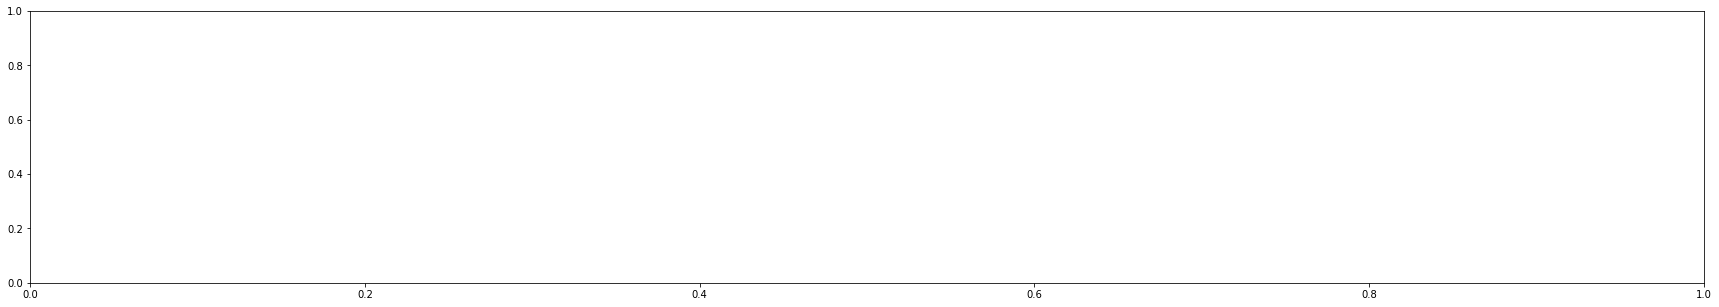

In [2]:
fps = pd.read_csv('/home/rob/HWR/darknet/val.txt',names=['fp'])['fp'].values
sample_size = 100
np.random.seed(42)
sample = np.random.choice(fps,size=sample_size)
fig = plt.figure(figsize = (30,5))
ax = fig.add_subplot(111)

In [33]:
sample

array(['/home/rob/HWR/datasets/zooniverse/219414/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/221652/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/219858/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/221881/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/222919/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/219777/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/Aarhus/NHMA-ENT-199094-FullFaked.jpg',
       '/home/rob/HWR/datasets/zooniverse/221602/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/220560/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/223058/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/221900/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/219657/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/222362/Fake_LowRes002.jpg',
       '/home/rob/HWR/datasets/zooniverse/222654/Fake_LowRes002.jpg',
       '/home/rob/HW

In [38]:
out = []
for s in sample:
    if 'zooniverse' in s:
        out += [s.replace('Fake_LowRes','LowRes')]
    elif 'Aarhus' in s:
        out += [s.replace('FullFaked','lab')]
        break
pd.Series(out).to_csv('/home/rob/HWR/darknet/100_darknet_test_set.txt',index=False)

In [13]:
import rawpy
from tqdm import tqdm_notebook as tqdm
fps = glob('/home/rob/HWR/datasets/Aarhus/*-lab.CR2')
for fp in tqdm(fps):
    with rawpy.imread(fp) as raw:
        img = raw.postprocess(use_camera_wb=True)
    cv2.imwrite(fp.replace('CR2','jpg'),cv2.cvtColor(img,cv2.COLOR_RGB2BGR))


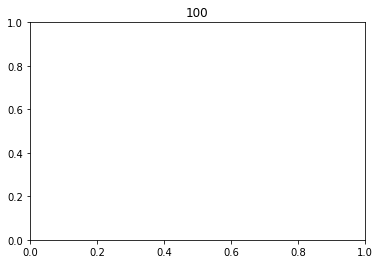

In [20]:
#res = []
i=0
for fp in tqdm(sample):
    print(i)
    i+=1
    #print(fp)
    #full = cv2.imread(fp)
    if 'Aarhus' in fp:
        labels = glob(fp.replace('FullFaked','lablabel*'))
        for label in labels:
            img= cv2.imread(label)
            plt.title(i)
            ax.imshow(img)
            display.display(fig) 
            _type = input()
            res += [[fp,label,_type]]
            clear_output()
    elif 'zooniverse' in fp:
        labels = glob(fp.replace('Fake_LowRes','Label').replace('.jpg','*.jpg'))
        for label in labels:
            img = cv2.imread(label)
            ax.imshow(img)
            plt.title(i)
            display.display(fig) 
            _type = input()
            res += [[fp,label,_type]]
            clear_output()

In [24]:
df=pd.DataFrame(res,columns=['orig_fp','label_fp','_type'])
df['type_no'] = df['_type'].map(set_type_no)
        
bad_fakes = df[df['type_no'].map(lambda x: np.isnan(x))]['orig_fp'].values
df = df[df['orig_fp'].map(lambda x: x not in bad_fakes)]
df#.to_csv('classifications.csv')

In [22]:
def set_type_no(_type):
    if _type == 'q':
        return 0
    elif _type == 'h':
        return 1
    elif _type == 'o':
        return 2
    elif _type == 'm':
        return 3
    else:
        return np.nan

In [ ]:
#grab 100 random of zooniverse and aarhus actual validation images 
#grab associated labels
#assign each label a classification
#run map